In [1]:
from scipy.stats import beta, binom
import matplotlib.pyplot as plt
import numpy as np
import emcee
%matplotlib inline

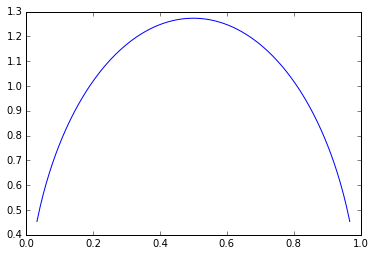

In [2]:
a = 1.5
b = 1.5

x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

plt.plot(x, beta.pdf(x, a, b))

In [3]:
#### Generate random numbers from beta distribution ####

r = beta.rvs(a, b, size=1000)

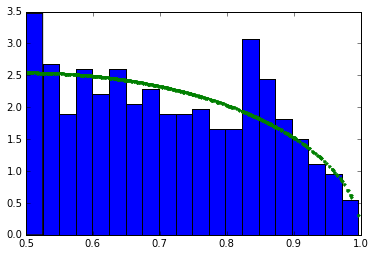

In [4]:
s = r[r>=0.5]
plt.hist(s, normed=1, bins = 20)
plt.plot(s, 2*beta.pdf(s, a, b), '.')
plt.show()

Bayes: $P(a, b| s) = P(s|a,b)P(a,b)/P(s)$

$ P (s|a,b) = $ beta distribution

In [60]:
def log_prior(theta):
    a, b = theta
    r_1 = beta.rvs(a, b, size=1)
    r_2 = beta.rvs(a, b, size=1)
    prior_a = np.random.normal(a)
    prior_b = np.random.normal(b)
    log_prior_a = np.log(prior_a)
    log_prior_b = np.log(prior_b)
    log_prior = log_prior_a + log_prior_b
    return log_prior

def log_likelihood(theta, x):
    a, b = theta
    #y_model = alpha + beta * x
    likelihood = 2. * beta.pdf(x, a, b) #binom.pmf(x, 50, 0.5) #
    log_likelihood = np.log(likelihood)
    return log_likelihood # Gaussian: -0.5 * np.sum(np.log(2 * np.pi * sigma ** 2) + (y - y_model) ** 2 / sigma ** 2)

def log_posterior(theta, x):
    return log_prior(theta) + log_likelihood(theta, x)

In [61]:
ndim = 2  # number of parameters in the model
nwalkers = 50  # number of MCMC walkers
nburn = 100  # "burn-in" period to let chains stabilize
nsteps = 2000  # number of MCMC steps to take

# set theta near the maximum likelihood, with 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))



In [62]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[s])
%time sampler.run_mcmc(starting_guesses, nsteps)
print("done")


NaN value of lnprob for parameters: 
[ 0.60276338  0.54488318]
[ 0.43758721  0.891773  ]
[ 0.56804456  0.92559664]
[ 0.07103606  0.0871293 ]
[ 0.0202184   0.83261985]
[ 0.97861834  0.79915856]
[ 0.46147936  0.78052918]
[ 0.11827443  0.63992102]
[ 0.14335329  0.94466892]
[ 0.26455561  0.77423369]
[ 0.45615033  0.56843395]
[ 0.0187898  0.6176355]
[ 0.61209572  0.616934  ]
[ 0.31542835  0.36371077]
[ 0.46631077  0.24442559]
[ 0.15896958  0.11037514]
[ 0.65632959  0.13818295]
[ 0.82099323  0.09710128]
[ 0.83794491  0.09609841]
[ 0.73926358  0.03918779]
[ 0.28280696  0.12019656]
[ 0.2961402   0.11872772]
[ 0.31798318  0.41426299]
[ 0.56660145  0.26538949]
[ 0.52324805  0.09394051]
[ 0.31856895  0.66741038]
[ 0.13179786  0.7163272 ]
[ 0.28940609  0.18319136]
[ 0.58651293  0.02010755]


C:\Users\Sophia Milanov\Anaconda\lib\site-packages\IPython\kernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log
C:\Users\Sophia Milanov\Anaconda\lib\site-packages\IPython\kernel\__main__.py:7: RuntimeWarning: invalid value encountered in log
C:\Users\Sophia Milanov\Anaconda\lib\site-packages\IPython\kernel\__main__.py:8: RuntimeWarning: invalid value encountered in log


ValueError: lnprob returned NaN.

In [44]:
emcee_trace = sampler.chain[:, nburn:, :].reshape(-1, ndim).T
#plot_MCMC_results(s, emcee_trace)

In [ ]:
print(emcee_trace)